<a href="https://colab.research.google.com/github/s24966904/note/blob/main/tSNE_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_val = keras.utils.to_categorical(y_val, num_classes=10)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16 ,3, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(16 ,3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32 ,3, padding='same', activation='relu'),
    keras.layers.Conv2D(32 ,3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(keras.optimizers.Adam(), keras.losses.categorical_crossentropy, metrics=[keras.metrics.categorical_accuracy])

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.7413 - categorical_accuracy: 0.8755
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0567 - categorical_accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0398 - categorical_accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0344 - categorical_accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0293 - categorical_accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0255 - categorical_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0207 - categorical_accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - categorical_accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0196 - ca

In [ ]:
model2 = keras.models.Model(model.inputs, model.layers[-2].output)

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0     

In [ ]:
x_train_features = model2.predict(x_train)

In [ ]:
y_train_raw = np.argmax(y_train, axis=-1)

In [ ]:
x_train_features.shape, y_train_raw.shape

((60000, 1568), (60000,))

In [ ]:
x_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(x_train_features[:1000])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.101s...
[t-SNE] Computed neighbors for 1000 samples in 3.169s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 10.981778
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.802460
[t-SNE] KL divergence after 1000 iterations: 0.760117


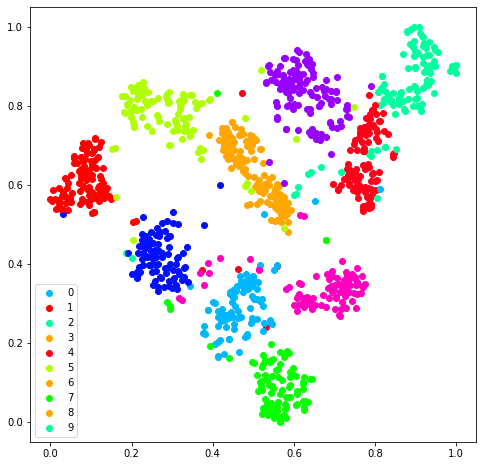

In [ ]:
# normalize
x_min, x_max = x_tsne.min(0), x_tsne.max(0)
x_norm = (x_tsne - x_min) / (x_max - x_min)

plt.figure(figsize=(8, 8))
cmap = plt.cm.get_cmap("hsv", 10)
for i in range(len(x_tsne[:])):
    digit = y_train_raw[i]
    plt.scatter(x_norm[i, 0], x_norm[i, 1], color=cmap(digit), )
plt.legend([str(i) for i in range(10)])
plt.show()